In [127]:
import torch
import argparse
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import homework
from homework import dense_transforms
from homework import utils
import homework.train
from homework import models
from importlib import reload
reload(homework), reload(models), reload(homework.train), reload(homework.utils);

In [128]:
d = homework.models.Detector()

In [129]:
loader = utils.DetectionSuperTuxDataset('dense_data/valid')
x = loader.__getitem__(0)

In [130]:
d.detect(x)

C:\Users\Owner\Documents\dl\hw4\homework\fcn.th


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [133]:
torch.randn(1,3,1)[:,[1,2],:].shape

torch.Size([1, 2, 1])

In [20]:
from collections import namedtuple
args = namedtuple('args', 'log_dir other_args')
args.log_dir = 'log'
args.learning_rate = 0.001
args.num_epoch = 20
args.gamma = 0
args.continue_training = False
lo, la = homework.train.train(args)

In [23]:
gamma = 0
DENSE_CLASS_DISTRIBUTION = [0.77357634, 0.11783845, 0.10858521]
#w = torch.as_tensor(DENSE_CLASS_DISTRIBUTION)**(-gamma)
loss = torch.nn.BCEWithLogitsLoss()#weight=w / w.mean())

In [32]:
loss(torch.ones(100)*2, torch.ones(100)*2)

tensor(-1.8731)

In [631]:
la.permute((0,2,3,1))[0].shape

torch.Size([96, 128, 3])

In [637]:
la.permute((0,2,3,1))[0].shape

torch.Size([96, 128, 3])

In [657]:
loss(torch.zeros(1), torch.zeros(1))#la.permute((0,2,3,1))[0])

tensor(0.)

In [ ]:
loss

In [65]:
!python -m grader homework -v

Loading assignment
Loading grader
 * extract_peak                                      
  - return value                                       [ passed ]
  - peak extraction                                    [ passed ]
  - radius=1                                           [ passed ]
  - randomized test                                    [ passed ]
 --------------------------------------------------    [  20 /  20 ]

 * Detector                                          
  - return value                                       [ Crash "Error(s) in loading state_dict for Detector:
	size mismatch for classifier.bias: copying a param with shape torch.Size([3]) from checkpoint, the shape in current model is torch.Size([5]).
	size mismatch for classifier.weight: copying a param with shape torch.Size([3, 19, 1, 1]) from checkpoint, the shape in current model is torch.Size([5, 19, 1, 1])." ]
 --------------------------------------------------    [   0 /   5 ]

  - Your program crashed "Error(s)

In [40]:
logit = torch.ones(10,10,10,10)
p = 1 / (1 + torch.exp(-logit))
loss_val = -(1-p)**gamma * torch.log(p)
loss_val

In [60]:
fl = FocalLoss()
fl(lo, la)

TypeError: isinstance() arg 2 must be a type or tuple of types

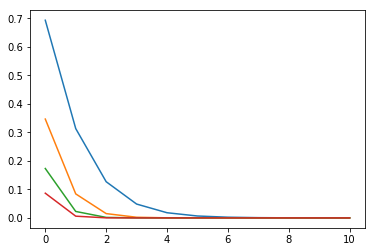

In [37]:

for gamma in range(0,4):    
    loss = []
    for l in np.linspace(0,10,11):
        logit = torch.ones()
        p = 1 / (1 + torch.exp(-logit))
            loss_val = -(1-p)**gamma * torch.log(p)
    
    plt.plot(loss)